# Задание 5.1

In [10]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'database': 'simulator_20230820',
    'user': 'student',
    'password': 'dpo_python_2020'   
}

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse
import hashlib
# import swifter
from scipy import stats
%matplotlib inline

In [12]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-23' and '2023-07-29'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

group_A=df[df.exp_group==2].copy()
group_B=df[df.exp_group==3].copy()



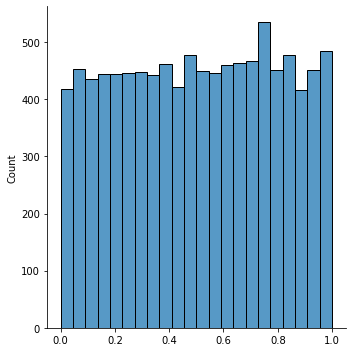

In [13]:
ps = []
for _ in range (10000):
    _, p_value = stats.ttest_ind(group_A.ctr.sample(500, replace=False),
                                 group_B.ctr.sample(500, replace=False),
                                 equal_var = False)
    ps.append(p_value)
sns.displot(ps)



In [14]:
sum(np.array(ps)<0.05)/10000

0.0466

Ответ: ~ 5 %. Это является приемлемым результатом, АА тест пройден.